# Perceptron de Multiples Capas - MLP

Los perceptrones multicapas son un tipo de ANN fromada por múúltiples capas de neurinas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón. 

Los perceptrones de multiples capas son conjuntos de perceptrones conectados, donde la salida de un perceptron en una de las capas es la entrada para una neurona en la siguiente capa. Esta estrategia permite extraer una representación fina de la información que entra a la ANN.

Los datos en la entrada pasan por un conjunto de capas de neuronas (llamadas capas ocultas) la salida de este conjunto de capas son la entrada para una neurona de salida de la cual obtenemos un único resultado. La siguiente Figura esquematiza la forma en que la información pasa a través de cada neurona en diferente capas.

![](https://drive.google.com/uc?id=1qtVjikjui3DqybyiH4ndbL9mS65T4zmx)


De la misma forma en la que un perceptron actualiza sus pesos, los MLP actualizan los pesos de todas sus neuronas en un proceso llamado *backpropagation* (o retropropagación). Este proceso es hecho por el *optimizador* que se encarga de calcular el gradiente de la función de error por cada peso de la red, estos pesos son actualizados en cada época y el objetivo es minimizar el error. 

![](https://drive.google.com/uc?id=15PgGM3v_m8qYENE96uOJrD29_o8p6kLq)

Las ANN modernas usan una combinación de multiples capas y reciben el nombre de redes neuronales profundas ("Deep neural networks").


# Ejercicio

En este ejercicio usaremos el dataset de [red wine quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) para clasificar el vino entre vino de alta calidad y vino de baja calidad usando todos lo features del dataset. El modelo que usaremos será un [Multi Layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) del paquete [scikitlearn](https://scikit-learn.org/).

In [1]:
#--- Leemos los datos con pandas
import pandas as pd

data = pd.read_csv('winequality-red.csv')

#-- Identificamos los nombres de las columnas
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [2]:
#-- Cargamos los features y los objetivos

X = data.drop(['quality'], axis = 'columns')
Y = data['quality']

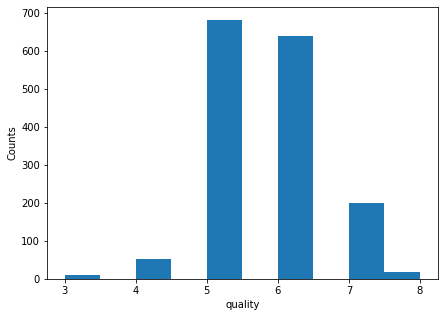

In [3]:
#--- Visualizamos los objetivos en un histograma

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('quality')
plt.show()

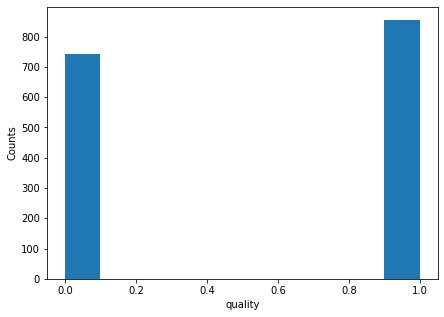

In [4]:
#-- Convertimos nuestro objetivo en un problema binario

import numpy as np
Y = np.array(Y)

Y[Y<6] = 0
Y[Y>=6] = 1


fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('quality')
plt.show()

In [5]:
#--- Dividimos nuestro dataset en Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [13]:
#--- Cargamos MLPCLassifier para buscar un modelo

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(2, 2), solver='adam', learning_rate_init=0.1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
#--- Entrenamos el modelo y realizamos una predicción

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [15]:
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [16]:
#--- Evaluamos el modelo con el accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.6475